# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [2]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

In [4]:
os.listdir()

['STTMINWGPA.csv',
 'CPIAUCSL.csv',
 'cleaned_data.csv',
 'Project_Template.ipynb']

## Step 0 | Imports and Setup

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
# Open a dataset from your project folder in Google Drive
minimum_wage = pd.read_csv('STTMINWGPA.csv')
consumer_price_index = pd.read_csv('CPIAUCSL.csv')

In [7]:
minimum_wage.head()

,observation_date,STTMINWGPA
0,2015-01-01,7.25
1,2016-01-01,7.25
2,2017-01-01,7.25
3,2018-01-01,7.25
4,2019-01-01,7.25


In [34]:
consumer_price_index.head()

,observation_date,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [8]:
# Data operations here

In [9]:
minimum_wage['observation_date'] = pd.to_datetime(minimum_wage['observation_date'])
consumer_price_index['observation_date'] = pd.to_datetime(consumer_price_index['observation_date'])

In [18]:
data = pd.merge(consumer_price_index, minimum_wage, on='observation_date', how='inner')
data.head()

,observation_date,CPIAUCSL,STTMINWGPA
0,2015-01-01,234.747,7.25
1,2016-01-01,237.652,7.25
2,2017-01-01,243.618,7.25
3,2018-01-01,248.859,7.25
4,2019-01-01,252.561,7.25


In [19]:
data = data.rename(columns={'CPIAUCSL': 'CPI','STTMINWGPA': 'PA_Min_Wage'})

In [20]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

In [21]:
data

,observation_date,CPI,PA_Min_Wage
0,2015-01-01,234.747,7.25
1,2016-01-01,237.652,7.25
2,2017-01-01,243.618,7.25
3,2018-01-01,248.859,7.25
4,2019-01-01,252.561,7.25
5,2020-01-01,259.127,7.25
6,2021-01-01,262.639,7.25
7,2022-01-01,282.542,7.25
8,2023-01-01,300.456,7.25
9,2024-01-01,309.794,7.25


## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

Does a minimum wage increase in Pennsylvania contribute to higher inflation rate?

In [16]:
# Exploratory Data Analysis here

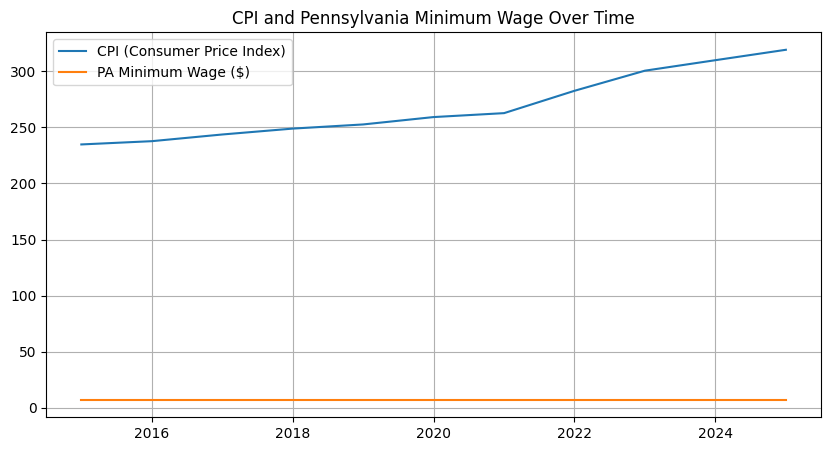

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(data['observation_date'], data['CPI'], label='CPI (Consumer Price Index)')
plt.plot(data['observation_date'], data['PA_Min_Wage'], label='PA Minimum Wage ($)')
plt.title('CPI and Pennsylvania Minimum Wage Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down your null hypothesis

2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

H_0: Minimum wage increases in Pennsylvania have no impact on inflation (CPI).

consumer_price_index= beta_0 + beta_1 (minimum_wage) + error_term

In [ ]:
# Build and run your model here

In [23]:
model = smf.ols('CPI ~ PA_Min_Wage', data=data).fit()
print(model.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0087      0.168     29.736      0.000       4.633       5.384
PA_Min_Wage    36.3133      1.221     29.736      0.000      33.592      39.034


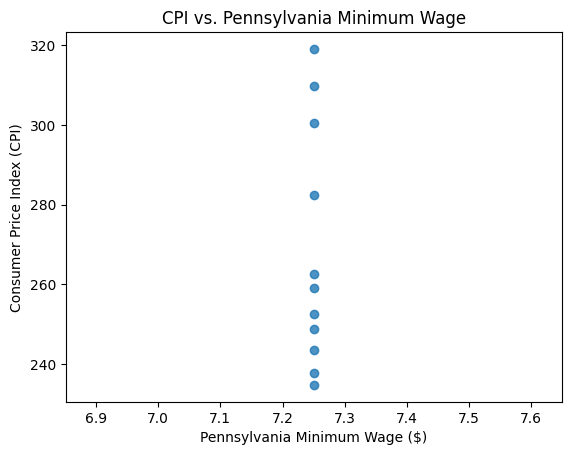

In [29]:
sns.regplot(data=data, y='CPI', x='PA_Min_Wage')
plt.xlabel('Pennsylvania Minimum Wage ($)')
plt.ylabel('Consumer Price Index (CPI)')
plt.title('CPI vs. Pennsylvania Minimum Wage')
plt.show()

Since the minimum wage stayed constant at $7.25 throughout the years, the results show no measurable relationship between minimum wage and inflation.